<a href="https://colab.research.google.com/github/programmerfaz/Machine-learning-Projects/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loan Prediction Machine Learning Support vector machine**

This project aims to predict the likelihood of a loan being approved or the loan amount a borrower is eligible for, based on historical data. It involves analyzing various features such as income, credit score, employment history, loan amount, debt-to-income ratio, and other financial metrics. The goal is to build a supervised support vector machine learning model that can accurately predict continuous values like loan amounts or probabilities of approval. This project is useful for banks, financial institutions, or fintech companies to automate and optimize their loan approval processes, reduce risk, and improve decision-making.



In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection and preprocessing

In [4]:
#loading the dataset to pandas dataframe
loan_dataset = pd.read_csv("/content/drive/MyDrive/DATASET/Loan prediction/train_u6lujuX_CVtuZ9i (1).csv")

In [5]:
loan_dataset.shape

(614, 13)

In [6]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
#statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
#Dropping all the null values since there are no all numerical values in the dataset to be replace by central measure of tendency
loan_dataset = loan_dataset.dropna()

In [10]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [11]:
# label encoding: instead of using Y and N we replace Y with 1 and N with 0 to make the analysis more accurate
loan_dataset.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

<ipython-input-11-07424855bc1e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)


In [12]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [13]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [14]:
#replacing all the 3+ values with 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [15]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


Data visualization

<ipython-input-16-3d0ae27c3324>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(x="Education",hue="Loan_Status",data=loan_dataset,color="blue")


<Axes: xlabel='Education', ylabel='count'>

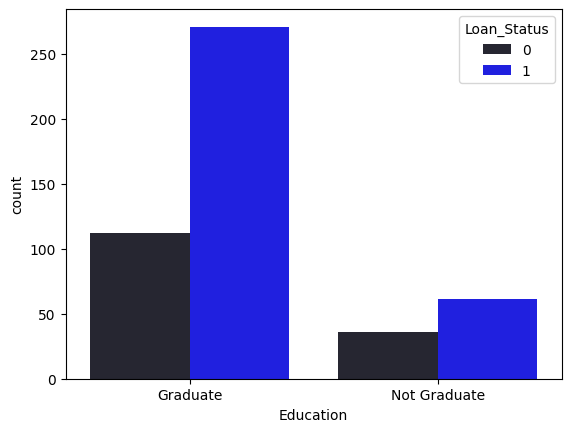

In [16]:
#checking the corelation of a person who is graduated and gets a loan
sns.countplot(x="Education",hue="Loan_Status",data=loan_dataset,color="blue")

From the abovr graph it is clear that a person who is graduated and applies for a loan gets it for the majority of time in comparrision to those who are not graduated.

<ipython-input-17-af3b106aab5d>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(x="Married",hue="Loan_Status",data=loan_dataset,color="blue")


<Axes: xlabel='Married', ylabel='count'>

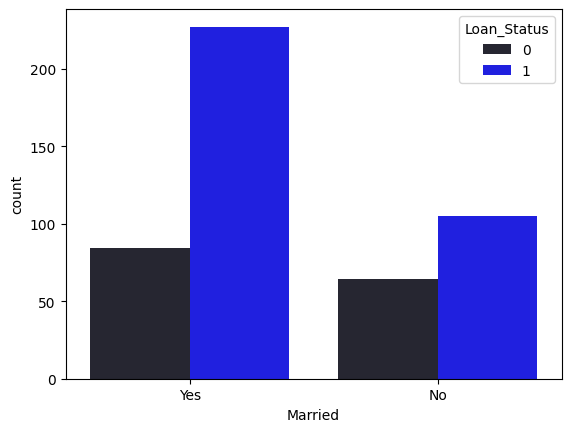

In [17]:
#Now checking the status of a person who is married with the loan approved
sns.countplot(x="Married",hue="Loan_Status",data=loan_dataset,color="blue")

From the above figure it is shown that a a person who is married gets his loan approved in comparision to the person who is not married

In [18]:
#converting all the text data into numeric form for the data to be trained
loan_dataset.replace({"Married":{"No":0,"Yes":1}},inplace=True)
loan_dataset.replace({"Gender":{"Male":1,"Female":0}},inplace=True)
loan_dataset.replace({"Self_Employed":{"No":0,"Yes":1}},inplace=True)
loan_dataset.replace({"Education":{"Graduate":1,"Not Graduate":0}},inplace=True)
loan_dataset.replace({"Property_Area":{"Rural":0,"Semiurban":1,"Urban":2}},inplace=True)

<ipython-input-18-1d062f0a3959>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Married":{"No":0,"Yes":1}},inplace=True)
<ipython-input-18-1d062f0a3959>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Gender":{"Male":1,"Female":0}},inplace=True)
<ipython-input-18-1d062f0a3959>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future

In [19]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


Training and testing the data

In [20]:
#separating the data and the label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [21]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [22]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [25]:
print(Y.shape,Y_train.shape,Y_test.shape)

(480,) (432,) (48,)


Training the model

Support vector machine

In [27]:
classifier = svm.SVC(kernel='linear')

In [28]:
#traning the support vector machine
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [31]:
#predicting the accuracy score for training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [32]:
print(training_data_accuracy*100)

79.86111111111111


In [33]:
#calculating the accuracy score for testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [35]:
print(testing_data_accuracy*100)

83.33333333333334


From above 2 output it is clear that the model predicted the training data values with an accuracy of 79% and for testing data it predicted the value with 83%

Making a predictive system

In [79]:
print(X_test)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
368       1        1          1          1              0             6325   
74        1        1          4          1              1             5266   
135       1        1          4          1              0             4000   
53        1        1          2          1              0             4616   
96        0        1          0          1              0             2484   
388       1        1          0          1              0             2333   
345       1        1          0          1              0             2499   
8         1        1          2          1              0             4006   
549       1        1          0          1              0             2785   
99        1        1          0          1              0             1759   
49        0        0          0          1              0             4000   
513       1        1          0          1              0       

In [90]:
X_new = pd.DataFrame(X_train.iloc[0].values.reshape(1, -1), columns=X_train.columns)#Reshape your data using array.reshape(-1, 1)

prediction = classifier.predict(X_new)
print(prediction)

if (prediction[0] == 0):
  print('The loan is not approved')
else:
  print('The loan is approved')

[0]
The loan is not approved


In [91]:
X_new = pd.DataFrame(X_train.iloc[30].values.reshape(1, -1), columns=X_train.columns)#Reshape your data using array.reshape(-1, 1)

prediction = classifier.predict(X_new)
print(prediction)

if (prediction[0] == 0):
  print('The loan is not approved')
else:
  print('The loan is approved')

[1]
The loan is approved
